In [1]:
!pip install xlrd==1.2.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 103 kB 5.3 MB/s 
  Attempting uninstall: xlrd
    Found existing installation: xlrd 1.1.0
    Uninstalling xlrd-1.1.0:
      Successfully uninstalled xlrd-1.1.0


# Data cleaning

In [2]:
#import packages

import pandas as pd


In [3]:
def check_position(df):
    first_header = [i for i in df.columns]
    index_first_header = {}
    for i,j in enumerate(first_header):
        if "Unnamed" not in j:
            index_first_header[j] = i
    second_header = [i for i in df.loc[0,:].values]
    index_second_header = {}
    for i,j in enumerate(second_header):
        if type(j) == str:
            index_second_header[j] = i
    index_second_header['ending'] = 999
    return index_first_header, index_second_header

In [4]:
def adjust_header(df):
    new_header = df.iloc[1] 
    df = df[2:]
    df.columns = new_header
    return df

In [5]:
def unpivot_df(df):
    index_first_header, index_second_header = check_position(df)
    df = adjust_header(df)
    df_items = df.iloc[:,:9]
    
    list_df = []
    key_list = list(index_second_header.keys())
    for index in range(len(key_list)-1):
        start_index = index_second_header[key_list[index]] 
        lenght = index_second_header[key_list[index+1]] - index_second_header[key_list[index]]
        temp_df = df.iloc[:, start_index:start_index + lenght]
        full_temp_df = pd.merge(df_items, temp_df, left_index=True, right_index=True)
        df_value = full_temp_df.drop(df_items.columns, axis=1)
        unpivot_df = pd.melt(full_temp_df, id_vars = df_items.columns, value_vars = df_value.columns,
               var_name ='Major', value_name ='Count')
        unpivot_df['Faculty'] = key_list[index]
        unpivot_df = unpivot_df[unpivot_df['Count'] > 0]
        list_df.append(unpivot_df)   
    
    return list_df

In [6]:
import os
import re

path = os.getcwd()

# assign current path to dir_list to keep all files in path 
dir_list = os.listdir(path)

summary_data = []
for file in dir_list:
    x = re.findall("\d{4}.xls", file) # อ่านไฟล์ที่ชื่อไฟล์เป็นตัวเลข 4 ตัวและลงท้ายด้วย xls
    if len(x) != 0:
        df = pd.read_excel(x[0])
        set_df = unpivot_df(df)
        consolidate = pd.concat(set_df)
        consolidate['Year'] = x[0][:4]
        summary_data.append(consolidate)


        
summary_df = pd.concat(summary_data)

In [7]:
def check_edu_level(x):
  Bach = ['วิศวกรรมศาสตร์', 'วิทยาศาสตร์', 'เกษตร', 'บริหารธุรกิจ']
  if x in Bach:
    return "ปริญญาตรี"
  else:
    return "อาชีวะ"

In [8]:
summary_df['ระดับการศึกษา'] = summary_df["Faculty"].apply(check_edu_level)

In [9]:
summary_df

,เลขที่คำขอ,เลขที่บัตรส่งเสริม,ชื่อบริษัทภาษาไทย,สถานที่ตั้งโรงงาน,เบอร์โทรศัพท์,เบอร์โทรสาร,จังหวัด,ประเภทกิจการ,ชื่อผลิตภัณฑ์,Major,Count,Faculty,Year,เลขที่บัตรส่งเสรม,ระดับการศึกษา
2,610182,63-0101-1-00-1-0,อาร์ต ออฟ เบคกิ้ง,111/21 หมู่ที่ 2 ต.ท่าจีน อ.เมือง สมุทรสาคร 74000,034-440157,NaN,สมุทรสาคร,[1.17],Frozen Pizza Disc/Pizza Dough,อุตสาหการ,1,วิศวกรรมศาสตร์,2563,NaN,ปริญญาตรี
4,620185,63-0079-1-00-0-0,เอ็นจีเค สปาร์คปลั๊กส์ (ประเทศไทย),700/864 หมู่ที่ 1 ต.พานทอง อ.พานทอง ชลบุรี 20160,NaN,NaN,ชลบุรี,[4.8.17],Oxygen Sensor,อุตสาหการ,2,วิศวกรรมศาสตร์,2563,NaN,ปริญญาตรี
14,610321,63-0062-1-05-1-0,ไทยนามพลาสติกส์,89/1-2 ถนนบางปลา ต.บ้านเกาะ อ.เมือง สมุทรสาคร ...,02-1193200,NaN,สมุทรสาคร,[6.6],Synthetic Leather & Plastic Sheet,อุตสาหการ,1,วิศวกรรมศาสตร์,2563,NaN,ปริญญาตรี
15,620710,63-0061-1-00-1-0,ซึบากิ (ไทยแลนด์),888/52 หมู่ที่ 9 ต.บางปลา อ.บางพลี สมุทรปราการ...,02-1307999,NaN,สมุทรปราการ,[6.2.2],Eco-Friendly Plastic Packaging,อุตสาหการ,1,วิศวกรรมศาสตร์,2563,NaN,ปริญญาตรี
16,620645,63-0058-1-00-0-0,โมเดิร์น ลักเกจ,155/1 หมู่ที่ 2 ต.หนองบอนแดง อ.บ้านบึง ชลบุรี ...,081-8412110,NaN,ชลบุรี,[3.3],Travel Luggage,อุตสาหการ,1,วิศวกรรมศาสตร์,2563,NaN,ปริญญาตรี
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19298,590728,NaN,บริษัท เอ็นซีอาร์ - ทีอาร์บี อินดัสตรี้ จำกัด,77/7 หมู่ที่ 1 มะขามคู่ นิคมพัฒนา ระยอง 21180,(038)038026,038-038014,ระยอง,6.6,Plastic Product for Industrial Goods,อาชีวศึกษาบริหารธุรกิจ อื่นๆ,1,บริหาร/ธุรกิจ,2559,59-1515-1-04-1-0,อาชีวะ
19300,573536,NaN,บริษัท ประสิทธิ์ ฟาร์ม จำกัด,99 หมู่ที่ 2 ชอนสารเดช หนองม่วง ลพบุรี 15170,(),NaN,ลพบุรี,1.5,Chicken Raising,อาชีวศึกษาบริหารธุรกิจ อื่นๆ,5,บริหาร/ธุรกิจ,2559,59-1517-0-00-1-0,อาชีวะ
19418,562220,NaN,บริษัท เกษตรไทย อินเตอร์เนชั่นแนล ชูการ์ คอร์ป...,สระโบสถ์ สระโบสถ์ ลพบุรี 15240,(),NaN,ลพบุรี,1.18,Ethanol (99.5%),อาชีวศึกษาบริหารธุรกิจ อื่นๆ,2,บริหาร/ธุรกิจ,2559,59-1639-0-13-2-0,อาชีวะ
19419,562224,NaN,บริษัท เกษตรไทย อินเตอร์เนชั่นแนล ชูการ์ คอร์ป...,ในเมือง สวรรคโลก สุโขทัย 64110,(),NaN,สุโขทัย,1.18,Ethanol (99.5%),อาชีวศึกษาบริหารธุรกิจ อื่นๆ,2,บริหาร/ธุรกิจ,2559,59-1640-0-13-2-0,อาชีวะ


In [10]:
summary_reduce = summary_df[['ชื่อบริษัทภาษาไทย', 'จังหวัด', 'ชื่อผลิตภัณฑ์', 'ประเภทกิจการ',
                            'Major', 'Count', 'Faculty', 'Year', 'ระดับการศึกษา']]

In [11]:
summary_reduce

,ชื่อบริษัทภาษาไทย,จังหวัด,ชื่อผลิตภัณฑ์,ประเภทกิจการ,Major,Count,Faculty,Year,ระดับการศึกษา
2,อาร์ต ออฟ เบคกิ้ง,สมุทรสาคร,Frozen Pizza Disc/Pizza Dough,[1.17],อุตสาหการ,1,วิศวกรรมศาสตร์,2563,ปริญญาตรี
4,เอ็นจีเค สปาร์คปลั๊กส์ (ประเทศไทย),ชลบุรี,Oxygen Sensor,[4.8.17],อุตสาหการ,2,วิศวกรรมศาสตร์,2563,ปริญญาตรี
14,ไทยนามพลาสติกส์,สมุทรสาคร,Synthetic Leather & Plastic Sheet,[6.6],อุตสาหการ,1,วิศวกรรมศาสตร์,2563,ปริญญาตรี
15,ซึบากิ (ไทยแลนด์),สมุทรปราการ,Eco-Friendly Plastic Packaging,[6.2.2],อุตสาหการ,1,วิศวกรรมศาสตร์,2563,ปริญญาตรี
16,โมเดิร์น ลักเกจ,ชลบุรี,Travel Luggage,[3.3],อุตสาหการ,1,วิศวกรรมศาสตร์,2563,ปริญญาตรี
...,...,...,...,...,...,...,...,...,...
19298,บริษัท เอ็นซีอาร์ - ทีอาร์บี อินดัสตรี้ จำกัด,ระยอง,Plastic Product for Industrial Goods,6.6,อาชีวศึกษาบริหารธุรกิจ อื่นๆ,1,บริหาร/ธุรกิจ,2559,อาชีวะ
19300,บริษัท ประสิทธิ์ ฟาร์ม จำกัด,ลพบุรี,Chicken Raising,1.5,อาชีวศึกษาบริหารธุรกิจ อื่นๆ,5,บริหาร/ธุรกิจ,2559,อาชีวะ
19418,บริษัท เกษตรไทย อินเตอร์เนชั่นแนล ชูการ์ คอร์ป...,ลพบุรี,Ethanol (99.5%),1.18,อาชีวศึกษาบริหารธุรกิจ อื่นๆ,2,บริหาร/ธุรกิจ,2559,อาชีวะ
19419,บริษัท เกษตรไทย อินเตอร์เนชั่นแนล ชูการ์ คอร์ป...,สุโขทัย,Ethanol (99.5%),1.18,อาชีวศึกษาบริหารธุรกิจ อื่นๆ,2,บริหาร/ธุรกิจ,2559,อาชีวะ


In [12]:
dim_df = pd.read_csv("ข้อมูลภาค.csv")# load ข้อมูลภาคเข้ามา เพื่อที่จะได้ map ชื่อจังหวัดเข้ากับภาค

In [13]:
dim_df.head()

,ProvinceNo,ProvinceMOI_ID,ProvinceNameThai,Region_VaccineRollout_MOPH,Region_RDPB,Region_RedCrossChapter,Region_SenatorFieldWork,Region_JFO,Region_TCGOffice,RegionID,...,Region_ThailandPost,Region_OccupationalSafety,Region_PrimaryIndustry_Mineral,Region_NACC,Region_ProvincialLabourOffice,Region_NFC,Region_Treasury,Region_Probation,Region_FRDFund,Region_COVIDCaseReport
0,1,10,กรุงเทพมหานคร,กรุงเทพมหานครและปริมณฑล,ภาคกลาง,NaN,NaN,ส่วนกลาง,สำนักงานเขตนครหลวง,7,...,"สำนักงานไปรษณีย์นครหลวง 1, สำนักงานไปรษณีย์นคร...","ศูนย์ความปลอดภัยในการทำงานเขต 11 (ตลิ่งชัน), ศ...",สำนักงานอุตสาหกรรมพื้นฐานและการเหมืองแร่ เขต 7...,ส่วนกลาง,ส่วนกลาง,ภาคกลาง,ภาคกลาง,สำนักงานคุมประพฤติกรุงเทพมหานคร 1-12,สำนักกิจการสาขาภูมิภาคที่ 2 (ภาคกลาง),ภาคกลาง
1,2,81,จังหวัดกระบี่,ภาคใต้,ภาคใต้,เหล่ากาชาดจังหวัดภาค 11,ภาคใต้,ภาคใต้,สำนักงานเขตภาคใต้ตอนบน,2,...,สำนักงานไปรษณีย์เขต 8,ศูนย์ความปลอดภัยในการทำงานเขต 8 (สุราษฎร์ธานี),สำนักงานอุตสาหกรรมพื้นฐานและการเหมืองแร่ เขต 4...,สำนักงาน ป.ป.ช. ภาค 8,ภาคใต้,ภาคใต้,ภาคใต้,สำนักงานคุมประพฤติภาค 8,สำนักกิจการสาขาภูมิภาคที่ 4 (ภาคใต้),ภาคใต้
2,3,71,จังหวัดกาญจนบุรี,ภาคตะวันตก,ภาคกลาง,เหล่ากาชาดจังหวัดภาค 4,ภาคกลาง,ภาคกลาง,สำนักงานเขตภาคตะวันตก,1,...,สำนักงานไปรษณีย์เขต 7,ศูนย์ความปลอดภัยในการทำงานเขต 7 (ราชบุรี),สำนักงานอุตสาหกรรมพื้นฐานและการเหมืองแร่ เขต 7...,สำนักงาน ป.ป.ช. ภาค 7,ภาคกลาง,ภาคกลาง,ภาคตะวันตก,สำนักงานคุมประพฤติภาค 7,สำนักกิจการสาขาภูมิภาคที่ 2 (ภาคกลาง),ภาคตะวันตก
3,4,46,จังหวัดกาฬสินธุ์,ภาคตะวันออกเฉียงเหนือ,ภาคตะวันออกเฉียงเหนือ,เหล่ากาชาดจังหวัดภาค 7,ภาคตะวันออกเฉียงเหนือ (ตอนบน),ภาคตะวันออกเฉียงเหนือ,สำนักงานเขตภาคตะวันออกเฉียงเหนือตอนบน,5,...,สำนักงานไปรษณีย์เขต 4,ศูนย์ความปลอดภัยในการทำงานเขต 4 (อุดรธานี),สำนักงานอุตสาหกรรมพื้นฐานและการเหมืองแร่ เขต 2...,สำนักงาน ป.ป.ช. ภาค 4,ภาคตะวันออกเฉียงเหนือ,ภาคตะวันออกเฉียงเหนือ,ภาคตะวันออกเฉียงเหนือ,สำนักงานคุมประพฤติภาค 4,สำนักกิจการสาขาภูมิภาคที่ 3 (ภาคตะวันออกเฉียงเ...,ภาคตะวันออกเฉียงเหนือ
4,5,62,จังหวัดกำแพงเพชร,ภาคกลาง,ภาคเหนือ,เหล่ากาชาดจังหวัดภาค 8,ภาคเหนือ (ตอนล่าง),ภาคเหนือ,สำนักงานเขตภาคเหนือตอนล่าง,6,...,สำนักงานไปรษณีย์เขต 6,ศูนย์ความปลอดภัยในการทำงานเขต 6 (นครสวรรค์),สำนักงานอุตสาหกรรมพื้นฐานและการเหมืองแร่ เขต 5...,สำนักงาน ป.ป.ช. ภาค 6,ภาคเหนือ,ภาคเหนือ,ภาคกลาง,สำนักงานคุมประพฤติภาค 6,สำนักกิจการสาขาภูมิภาคที่ 1 (ภาคเหนือ),ภาคกลาง


In [14]:
dim_df["ProvinceNameThai"] = dim_df["ProvinceNameThai"].str.replace('จังหวัด', '', regex=True) # กำจัด คำว่า จังหวัดทิ้ง

In [15]:
dim_df2 = dim_df[["ProvinceNameThai", "Region_VaccineRollout_MOPH"]] # เลือก 2 column ชื่อจังหวัด กับชื่อภาค

In [16]:
summary_with_dim = summary_reduce.merge(dim_df2, left_on='จังหวัด', right_on='ProvinceNameThai', how='left') # merge

In [17]:
summary_with_dim = summary_with_dim.drop(columns = ['ProvinceNameThai']) # drop column ProvinceNameThai เพราะไม่ใช้แล้ว 

In [18]:
summary_with_dim

,ชื่อบริษัทภาษาไทย,จังหวัด,ชื่อผลิตภัณฑ์,ประเภทกิจการ,Major,Count,Faculty,Year,ระดับการศึกษา,Region_VaccineRollout_MOPH
0,อาร์ต ออฟ เบคกิ้ง,สมุทรสาคร,Frozen Pizza Disc/Pizza Dough,[1.17],อุตสาหการ,1,วิศวกรรมศาสตร์,2563,ปริญญาตรี,กรุงเทพมหานครและปริมณฑล
1,เอ็นจีเค สปาร์คปลั๊กส์ (ประเทศไทย),ชลบุรี,Oxygen Sensor,[4.8.17],อุตสาหการ,2,วิศวกรรมศาสตร์,2563,ปริญญาตรี,ภาคตะวันออก
2,ไทยนามพลาสติกส์,สมุทรสาคร,Synthetic Leather & Plastic Sheet,[6.6],อุตสาหการ,1,วิศวกรรมศาสตร์,2563,ปริญญาตรี,กรุงเทพมหานครและปริมณฑล
3,ซึบากิ (ไทยแลนด์),สมุทรปราการ,Eco-Friendly Plastic Packaging,[6.2.2],อุตสาหการ,1,วิศวกรรมศาสตร์,2563,ปริญญาตรี,กรุงเทพมหานครและปริมณฑล
4,โมเดิร์น ลักเกจ,ชลบุรี,Travel Luggage,[3.3],อุตสาหการ,1,วิศวกรรมศาสตร์,2563,ปริญญาตรี,ภาคตะวันออก
...,...,...,...,...,...,...,...,...,...,...
51804,บริษัท เอ็นซีอาร์ - ทีอาร์บี อินดัสตรี้ จำกัด,ระยอง,Plastic Product for Industrial Goods,6.6,อาชีวศึกษาบริหารธุรกิจ อื่นๆ,1,บริหาร/ธุรกิจ,2559,อาชีวะ,ภาคตะวันออก
51805,บริษัท ประสิทธิ์ ฟาร์ม จำกัด,ลพบุรี,Chicken Raising,1.5,อาชีวศึกษาบริหารธุรกิจ อื่นๆ,5,บริหาร/ธุรกิจ,2559,อาชีวะ,ภาคกลาง
51806,บริษัท เกษตรไทย อินเตอร์เนชั่นแนล ชูการ์ คอร์ป...,ลพบุรี,Ethanol (99.5%),1.18,อาชีวศึกษาบริหารธุรกิจ อื่นๆ,2,บริหาร/ธุรกิจ,2559,อาชีวะ,ภาคกลาง
51807,บริษัท เกษตรไทย อินเตอร์เนชั่นแนล ชูการ์ คอร์ป...,สุโขทัย,Ethanol (99.5%),1.18,อาชีวศึกษาบริหารธุรกิจ อื่นๆ,2,บริหาร/ธุรกิจ,2559,อาชีวะ,ภาคกลาง


In [19]:
summary_with_dim.Region_VaccineRollout_MOPH = summary_with_dim.Region_VaccineRollout_MOPH.fillna('ไม่มีที่ตั้งแน่นอน') # fill na with ไม่มีที่ตั้งแน่นอน

In [20]:
summary_with_dim

,ชื่อบริษัทภาษาไทย,จังหวัด,ชื่อผลิตภัณฑ์,ประเภทกิจการ,Major,Count,Faculty,Year,ระดับการศึกษา,Region_VaccineRollout_MOPH
0,อาร์ต ออฟ เบคกิ้ง,สมุทรสาคร,Frozen Pizza Disc/Pizza Dough,[1.17],อุตสาหการ,1,วิศวกรรมศาสตร์,2563,ปริญญาตรี,กรุงเทพมหานครและปริมณฑล
1,เอ็นจีเค สปาร์คปลั๊กส์ (ประเทศไทย),ชลบุรี,Oxygen Sensor,[4.8.17],อุตสาหการ,2,วิศวกรรมศาสตร์,2563,ปริญญาตรี,ภาคตะวันออก
2,ไทยนามพลาสติกส์,สมุทรสาคร,Synthetic Leather & Plastic Sheet,[6.6],อุตสาหการ,1,วิศวกรรมศาสตร์,2563,ปริญญาตรี,กรุงเทพมหานครและปริมณฑล
3,ซึบากิ (ไทยแลนด์),สมุทรปราการ,Eco-Friendly Plastic Packaging,[6.2.2],อุตสาหการ,1,วิศวกรรมศาสตร์,2563,ปริญญาตรี,กรุงเทพมหานครและปริมณฑล
4,โมเดิร์น ลักเกจ,ชลบุรี,Travel Luggage,[3.3],อุตสาหการ,1,วิศวกรรมศาสตร์,2563,ปริญญาตรี,ภาคตะวันออก
...,...,...,...,...,...,...,...,...,...,...
51804,บริษัท เอ็นซีอาร์ - ทีอาร์บี อินดัสตรี้ จำกัด,ระยอง,Plastic Product for Industrial Goods,6.6,อาชีวศึกษาบริหารธุรกิจ อื่นๆ,1,บริหาร/ธุรกิจ,2559,อาชีวะ,ภาคตะวันออก
51805,บริษัท ประสิทธิ์ ฟาร์ม จำกัด,ลพบุรี,Chicken Raising,1.5,อาชีวศึกษาบริหารธุรกิจ อื่นๆ,5,บริหาร/ธุรกิจ,2559,อาชีวะ,ภาคกลาง
51806,บริษัท เกษตรไทย อินเตอร์เนชั่นแนล ชูการ์ คอร์ป...,ลพบุรี,Ethanol (99.5%),1.18,อาชีวศึกษาบริหารธุรกิจ อื่นๆ,2,บริหาร/ธุรกิจ,2559,อาชีวะ,ภาคกลาง
51807,บริษัท เกษตรไทย อินเตอร์เนชั่นแนล ชูการ์ คอร์ป...,สุโขทัย,Ethanol (99.5%),1.18,อาชีวศึกษาบริหารธุรกิจ อื่นๆ,2,บริหาร/ธุรกิจ,2559,อาชีวะ,ภาคกลาง


In [21]:
summary_with_dim.to_csv('summary_reduce.csv', index = False)

In [22]:
summary_with_dim.head()

,ชื่อบริษัทภาษาไทย,จังหวัด,ชื่อผลิตภัณฑ์,ประเภทกิจการ,Major,Count,Faculty,Year,ระดับการศึกษา,Region_VaccineRollout_MOPH
0,อาร์ต ออฟ เบคกิ้ง,สมุทรสาคร,Frozen Pizza Disc/Pizza Dough,[1.17],อุตสาหการ,1,วิศวกรรมศาสตร์,2563,ปริญญาตรี,กรุงเทพมหานครและปริมณฑล
1,เอ็นจีเค สปาร์คปลั๊กส์ (ประเทศไทย),ชลบุรี,Oxygen Sensor,[4.8.17],อุตสาหการ,2,วิศวกรรมศาสตร์,2563,ปริญญาตรี,ภาคตะวันออก
2,ไทยนามพลาสติกส์,สมุทรสาคร,Synthetic Leather & Plastic Sheet,[6.6],อุตสาหการ,1,วิศวกรรมศาสตร์,2563,ปริญญาตรี,กรุงเทพมหานครและปริมณฑล
3,ซึบากิ (ไทยแลนด์),สมุทรปราการ,Eco-Friendly Plastic Packaging,[6.2.2],อุตสาหการ,1,วิศวกรรมศาสตร์,2563,ปริญญาตรี,กรุงเทพมหานครและปริมณฑล
4,โมเดิร์น ลักเกจ,ชลบุรี,Travel Luggage,[3.3],อุตสาหการ,1,วิศวกรรมศาสตร์,2563,ปริญญาตรี,ภาคตะวันออก


# Data visualization

## Word Cloud

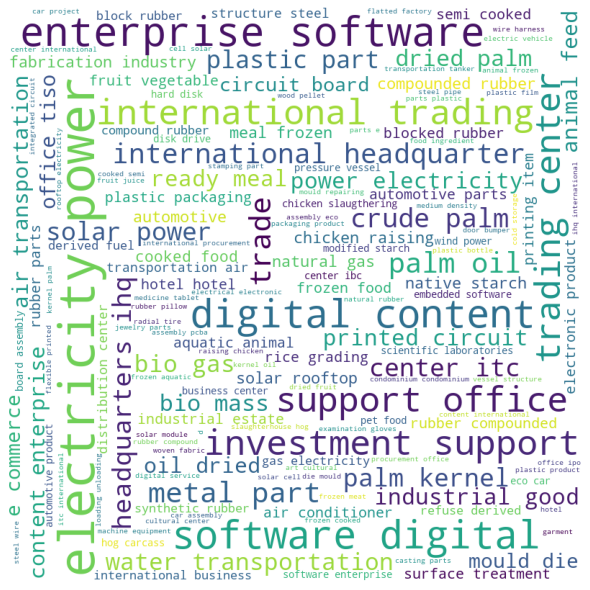

In [23]:
# Python program to generate WordCloud
import matplotlib.pyplot as plt
# importing all necessary modules
from wordcloud import WordCloud, STOPWORDS

industry = ''
stopwords = set(STOPWORDS)

# iterate through the csv file
for val in summary_with_dim.ชื่อผลิตภัณฑ์:
	
	# typecaste each val to string
	val = str(val)

	# split the value
	tokens = val.split()
	
	# Converts each token into lowercase
	for i in range(len(tokens)):
		tokens[i] = tokens[i].lower()
	
	industry += " ".join(tokens)+" "

wordcloud = WordCloud(width = 800, height = 800,
				background_color ='white',
				stopwords = stopwords,
				min_font_size = 10).generate(industry)

# plot the WordCloud image					
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)

plt.show()


In [24]:
industry

'frozen pizza disc/pizza dough oxygen sensor synthetic leather & plastic sheet eco-friendly plastic packaging travel luggage pet food high performance paper packaging/bioplastic coated paper packaging blocked rubber/compounded rubber crude palm kernel oil (cpko) ckd & skd (air conditioner) washing machine crude palm kernel oil (cpko) flexible printed circuit board (fpcb) battery for electric vehicle whey protein travel luggage electricity power from refuse derived fuel trade and investment support office : tiso sub frame international business center : ibc solar junction box medium density fiber board (mdf) washing machine r & d (medical packaging with living pores) sweet sauce garment busbar/busduct polyester staple fiber from recycled plastic multilayer stretch film aluminium & zinc parts trade and investment support office : tiso pcba (printed circuit board assembly) dried palm kernel oxygen delivery tube set with sampling line actuator & lifting columns ultrafast laser, super pump 

In [25]:
import matplotlib
import matplotlib.font_manager as fm
!wget https://github.com/Phonbopit/sarabun-webfont/raw/master/fonts/thsarabunnew-webfont.ttf #download font
fm.fontManager.ttflist += fm.createFontList(['thsarabunnew-webfont.ttf'])
matplotlib.rc('font', family='TH Sarabun New')

--2022-10-14 03:15:35--  https://github.com/Phonbopit/sarabun-webfont/raw/master/fonts/thsarabunnew-webfont.ttf
Resolving github.com (github.com)... 20.27.177.113
Connecting to github.com (github.com)|20.27.177.113|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/Phonbopit/sarabun-webfont/master/fonts/thsarabunnew-webfont.ttf [following]
--2022-10-14 03:15:35--  https://raw.githubusercontent.com/Phonbopit/sarabun-webfont/master/fonts/thsarabunnew-webfont.ttf
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 98308 (96K) [application/octet-stream]
Saving to: ‘thsarabunnew-webfont.ttf’

thsarabunnew-webfon 100%[===================>]  96.00K  --.-KB/s    in 0.02s   

2022-10-14 03:15:36 (5.02 MB/s) - 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: MatplotlibDeprecationWarning: 
The createFontList function was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use FontManager.addfont instead.
  after removing the cwd from sys.path.


In [26]:
summary_with_dim["Count"] = summary_with_dim["Count"].astype('float64')

In [27]:
groupby_region = summary_with_dim.groupby("Region_VaccineRollout_MOPH").sum()

In [28]:
groupby_region = groupby_region.sort_values(by=['Count'], ascending=False)

## plot region vs labor deman

### Chart

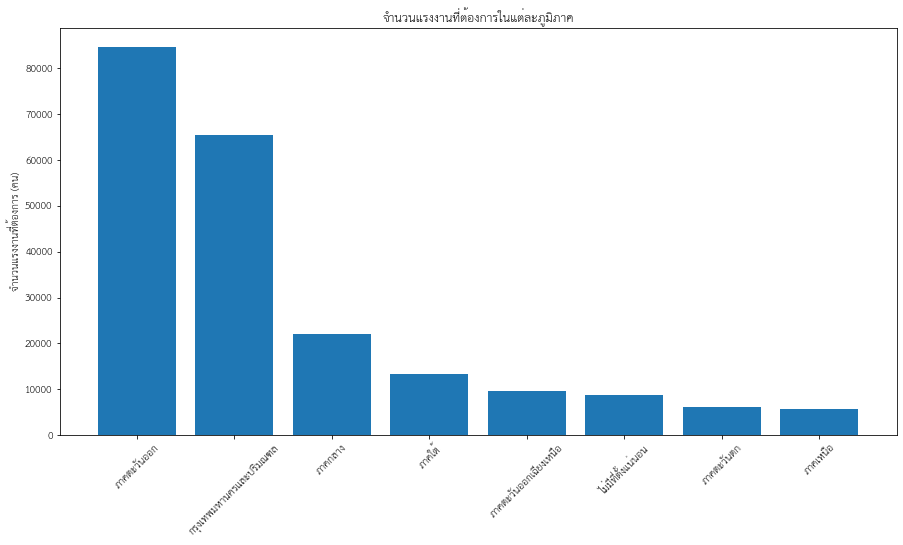

In [29]:
# plot region vs labor demand

fig = plt.figure(figsize = (15, 7.5))
 
# creating the bar plot
plt.bar(groupby_region.index, groupby_region.Count.values)
 
plt.ylabel("จำนวนแรงงานที่ต้องการ (คน)")
plt.xticks(rotation = 45)
plt.title("จำนวนแรงงานที่ต้องการในแต่ละภูมิภาค")
plt.show()

## plot year vs labor demand

### Chart

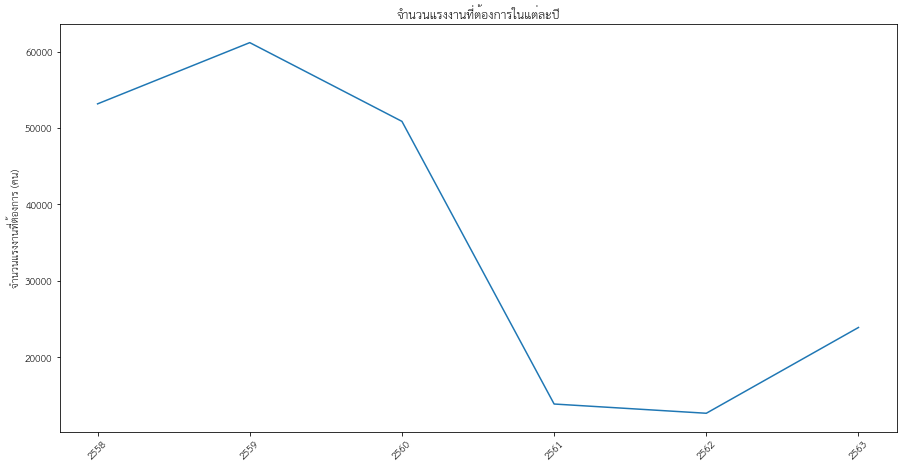

In [30]:
# plot year vs labor demand
fig = plt.figure(figsize = (15, 7.5))
groupby_year = summary_with_dim.groupby("Year").sum().sort_index(ascending=True)

 
# creating the bar plot
plt.plot(groupby_year.index, groupby_year.Count.values)
 
plt.ylabel("จำนวนแรงงานที่ต้องการ (คน)")
plt.xticks(rotation = 45)
plt.title("จำนวนแรงงานที่ต้องการในแต่ละปี")
plt.show()

In [31]:
groupby_year

,Count
Year,
2558,53153.0
2559,61163.0
2560,50862.0
2561,13889.0
2562,12680.0
2563,23902.0


## plot year vs labor demand breakdown by industry

### Preparation

In [32]:
# plot year vs labor demand breakdown by industry

all_year = groupby_year.index

In [33]:
df_list = []
for year in all_year:
  temp_df = summary_with_dim[summary_with_dim.Year == year]
  temp_df = temp_df.groupby("ชื่อผลิตภัณฑ์").sum().sort_values('Count', ascending = False)
  temp_df = temp_df.nlargest(n=5, columns = ["Count"])
  temp_df['Year'] = year
  df_list.append(temp_df)

groupby_year_indus = pd.concat(df_list)

In [34]:
groupby_year_indus

,Count,Year
ชื่อผลิตภัณฑ์,,
Air Transportation,3850.0,2558
Jewelry & Parts,2693.0,2558
Enterprise Software & Digital Content,1648.0,2558
Car Assembly (Eco-Car Project),1273.0,2558
Trade and Investment Support Office,1267.0,2558
Car Assembly (Eco-Car Project),4730.0,2559
Enterprise Software & Digital Content,3023.0,2559
Flexible Printed Circuit Assembly (FPCA),2280.0,2559
International Headquarters (IHQ),1489.0,2559


In [35]:
groupby_year_indus['Industry'] = groupby_year_indus.index
groupby_year_indus = groupby_year_indus.reset_index(drop=True)

In [36]:
groupby_year_indus

,Count,Year,Industry
0,3850.0,2558,Air Transportation
1,2693.0,2558,Jewelry & Parts
2,1648.0,2558,Enterprise Software & Digital Content
3,1273.0,2558,Car Assembly (Eco-Car Project)
4,1267.0,2558,Trade and Investment Support Office
5,4730.0,2559,Car Assembly (Eco-Car Project)
6,3023.0,2559,Enterprise Software & Digital Content
7,2280.0,2559,Flexible Printed Circuit Assembly (FPCA)
8,1489.0,2559,International Headquarters (IHQ)
9,1477.0,2559,Trade and Investment Support Office


In [37]:
import numpy as np
table = pd.pivot_table(groupby_year_indus, values='Count', index=['Year'],
                    columns=['Industry'], aggfunc=np.sum, fill_value=0)

In [38]:
table

Industry,Air Transportation,Amusement Park,Battery for Electric Vehicle,Car Assembly (Eco-Car Project),Component for Farm Machinery,Enterprise Software & Digital Content,Fabrication Industry,Fish Meal,Flexible Printed Circuit Assembly (FPCA),Hospital,...,Optical Fiber for Telecommunication Parts,PV Laminate,Parts for office Electronic,Printed Circuit Board Assembly (PCBA),Refrigerator,Slaughterhouse & Hog Carcass,Trade and Investment Support Office,Trade and Investment Support Office : TISO,"Vehicle Parts e.g. DOOR, BUMPER DOOR, BUMPER and FRONT/REAR AXLE",Vehicle Tire Wheel
Year,,,,,,,,,,,,,,,,,,,,,
2558,3850,0,0,1273,0,1648,0,0,0,0,...,0,0,0,0,0,0,1267,0,0,0
2559,0,0,0,4730,0,3023,0,0,2280,0,...,0,0,0,0,0,0,1477,0,0,0
2560,0,0,0,0,0,1857,1649,0,0,0,...,3856,0,0,1505,0,0,0,0,1496,0
2561,0,428,2786,0,0,0,0,0,0,0,...,0,475,0,0,0,402,0,0,0,0
2562,0,0,0,0,0,0,0,0,0,452,...,0,0,637,0,665,0,0,0,0,0
2563,0,0,0,0,601,0,0,1181,0,0,...,0,0,0,0,0,0,0,762,0,650


### Chart

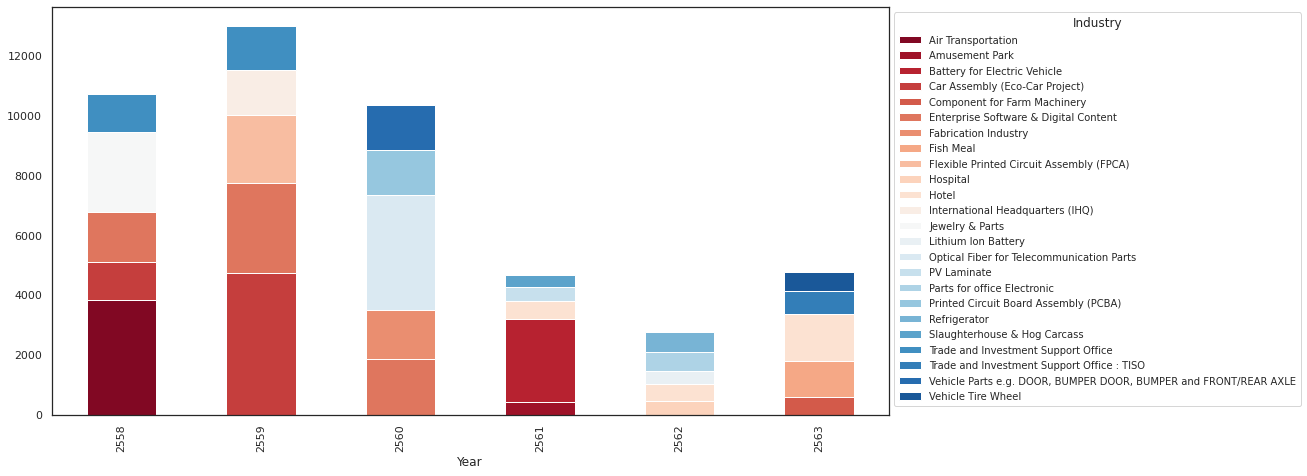

In [39]:
from seaborn.widgets import color_palette
import seaborn as sns

sns.set(rc={'figure.figsize':(15,7.5)})
#set seaborn plotting aesthetics
sns.set(style='white')

#create stacked bar chart
ax = table.plot(kind='bar', stacked=True, color = color_palette("RdBu", 25))
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
plt.setp(ax.get_legend().get_texts(), fontsize='10') # for legend text
plt.show()

## Labor demand by area

### Preparation

In [40]:
bangkok_area = summary_with_dim[summary_with_dim["Region_VaccineRollout_MOPH"] == "กรุงเทพมหานครและปริมณฑล"]

In [41]:
bangkok_df = bangkok_area[bangkok_area['จังหวัด'] == "กรุงเทพมหานคร"]
bangkok_df_perimeter = bangkok_area[bangkok_area['จังหวัด'] != "กรุงเทพมหานคร"]
east_area = summary_with_dim[summary_with_dim["Region_VaccineRollout_MOPH"] == "ภาคตะวันออก"]
north_area = summary_with_dim[summary_with_dim["Region_VaccineRollout_MOPH"] == "ภาคเหนือ"]
central_area = summary_with_dim[summary_with_dim["Region_VaccineRollout_MOPH"] == "ภาคกลาง"]
south_area = summary_with_dim[summary_with_dim["Region_VaccineRollout_MOPH"] == "ภาคใต้"]

In [42]:
group_bkk = bangkok_df.groupby("ชื่อผลิตภัณฑ์").sum().nlargest(n=5, columns = ["Count"]).sort_values(by=['Count'], ascending=False)
group_bkk_peri = bangkok_df_perimeter.groupby("ชื่อผลิตภัณฑ์").sum().nlargest(n=5, columns = ["Count"]).sort_values(by=['Count'], ascending=False)
group_east = east_area.groupby("ชื่อผลิตภัณฑ์").sum().nlargest(n=5, columns = ["Count"]).sort_values(by=['Count'], ascending=False)
group_north = north_area.groupby("ชื่อผลิตภัณฑ์").sum().nlargest(n=5, columns = ["Count"]).sort_values(by=['Count'], ascending=False)
group_central = central_area.groupby("ชื่อผลิตภัณฑ์").sum().nlargest(n=5, columns = ["Count"]).sort_values(by=['Count'], ascending=False)
group_south = south_area.groupby("ชื่อผลิตภัณฑ์").sum().nlargest(n=5, columns = ["Count"]).sort_values(by=['Count'], ascending=False)

### Chart

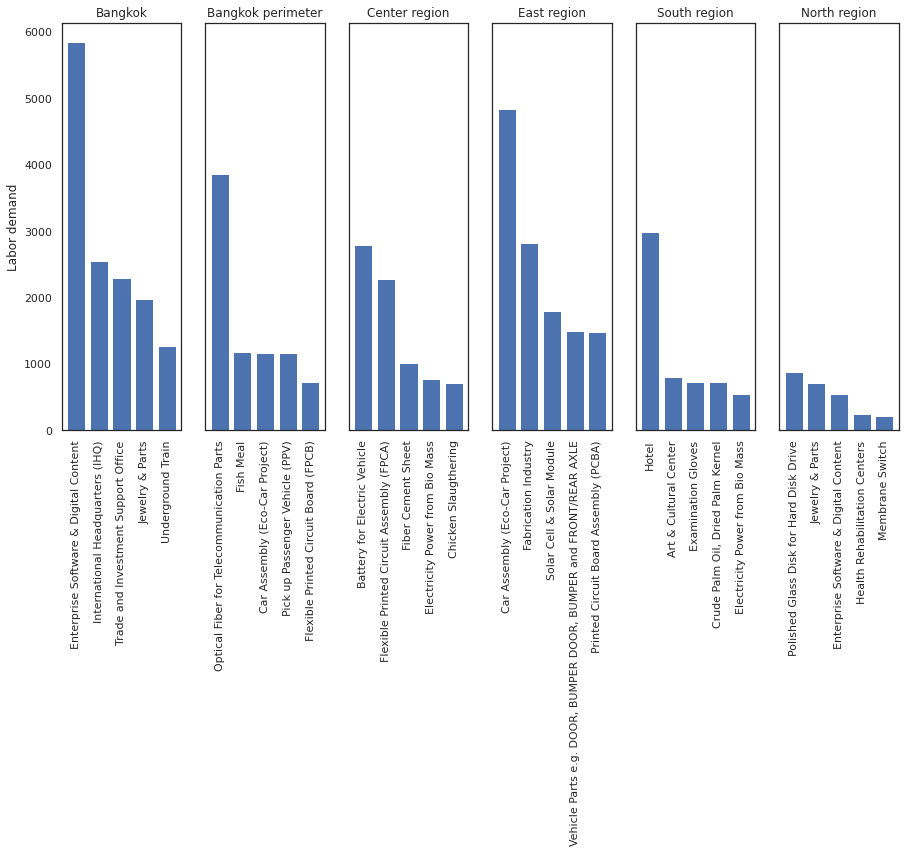

<Figure size 2160x1440 with 0 Axes>

In [43]:
fig, axs = plt.subplots(1, 6,sharey='row')


# Some example data to display

fig = plt.figure(figsize = (30, 20))

axs[0].bar(group_bkk.index, group_bkk.Count)
axs[0].set_title('Bangkok')

axs[1].bar(group_bkk_peri.index, group_bkk_peri.Count)
axs[1].set_title('Bangkok perimeter')

axs[2].bar(group_central.index, group_central.Count)
axs[2].set_title('Center region')

axs[3].bar(group_east.index, group_east.Count)
axs[3].set_title('East region')

axs[4].bar(group_south.index, group_south.Count)
axs[4].set_title('South region')

axs[5].bar(group_north.index, group_north.Count)
axs[5].set_title('North region')

for ax in axs.flat:
    ax.set(ylabel='Labor demand')

# Hide x labels and tick labels for top plots and y ticks for right plots.

for ax in axs.flat:
  ax.label_outer()
  for tick in ax.get_xticklabels():
      tick.set_rotation(90)

plt.show()

## Industry by education level by year



### Preparation

In [44]:
summary_with_dim.head()

,ชื่อบริษัทภาษาไทย,จังหวัด,ชื่อผลิตภัณฑ์,ประเภทกิจการ,Major,Count,Faculty,Year,ระดับการศึกษา,Region_VaccineRollout_MOPH
0,อาร์ต ออฟ เบคกิ้ง,สมุทรสาคร,Frozen Pizza Disc/Pizza Dough,[1.17],อุตสาหการ,1.0,วิศวกรรมศาสตร์,2563,ปริญญาตรี,กรุงเทพมหานครและปริมณฑล
1,เอ็นจีเค สปาร์คปลั๊กส์ (ประเทศไทย),ชลบุรี,Oxygen Sensor,[4.8.17],อุตสาหการ,2.0,วิศวกรรมศาสตร์,2563,ปริญญาตรี,ภาคตะวันออก
2,ไทยนามพลาสติกส์,สมุทรสาคร,Synthetic Leather & Plastic Sheet,[6.6],อุตสาหการ,1.0,วิศวกรรมศาสตร์,2563,ปริญญาตรี,กรุงเทพมหานครและปริมณฑล
3,ซึบากิ (ไทยแลนด์),สมุทรปราการ,Eco-Friendly Plastic Packaging,[6.2.2],อุตสาหการ,1.0,วิศวกรรมศาสตร์,2563,ปริญญาตรี,กรุงเทพมหานครและปริมณฑล
4,โมเดิร์น ลักเกจ,ชลบุรี,Travel Luggage,[3.3],อุตสาหการ,1.0,วิศวกรรมศาสตร์,2563,ปริญญาตรี,ภาคตะวันออก


In [45]:
group_education = summary_with_dim.groupby(["ระดับการศึกษา", "ชื่อผลิตภัณฑ์"]).sum().nlargest(n=11, columns = ["Count"])
group_education = group_education.sort_values(by=['Count'], ascending=False)
group_education

Count
ระดับการศึกษา ชื่อผลิตภัณฑ์                                    
ปริญญาตรี     Enterprise Software & Digital Content      6675.0
              Air Transportation                         5089.0
อาชีวะ        Car Assembly (Eco-Car Project)             4860.0
              Optical Fiber for Telecommunication Parts  3000.0
ปริญญาตรี     Hotel                                      2733.0
              International Headquarters (IHQ)           2698.0
              Trade and Investment Support Office        2466.0
อาชีวะ        Battery for Electric Vehicle               2153.0
              Fabrication Industry                       2071.0
              Hotel                                      2058.0
              Flexible Printed Circuit Assembly (FPCA)   2005.0

In [46]:
group_education = group_education.reset_index()

In [47]:
group_education = group_education.rename(columns={"ระดับการศึกษา": "Education", "ชื่อผลิตภัณฑ์": "Product"})

In [48]:
table = pd.pivot_table(group_education, values='Count', index=['Product'],
                    columns=['Education'], aggfunc=np.sum, fill_value=0)
table = table.rename(columns={"ปริญญาตรี": "Bachelor degree", "อาชีวะ": "Diploma"})

In [49]:
table['total'] = table['Bachelor degree'] + table['Diploma']
table = table.sort_values(by=['total'], ascending=False)
table = table.drop(columns= "total")

### Chart

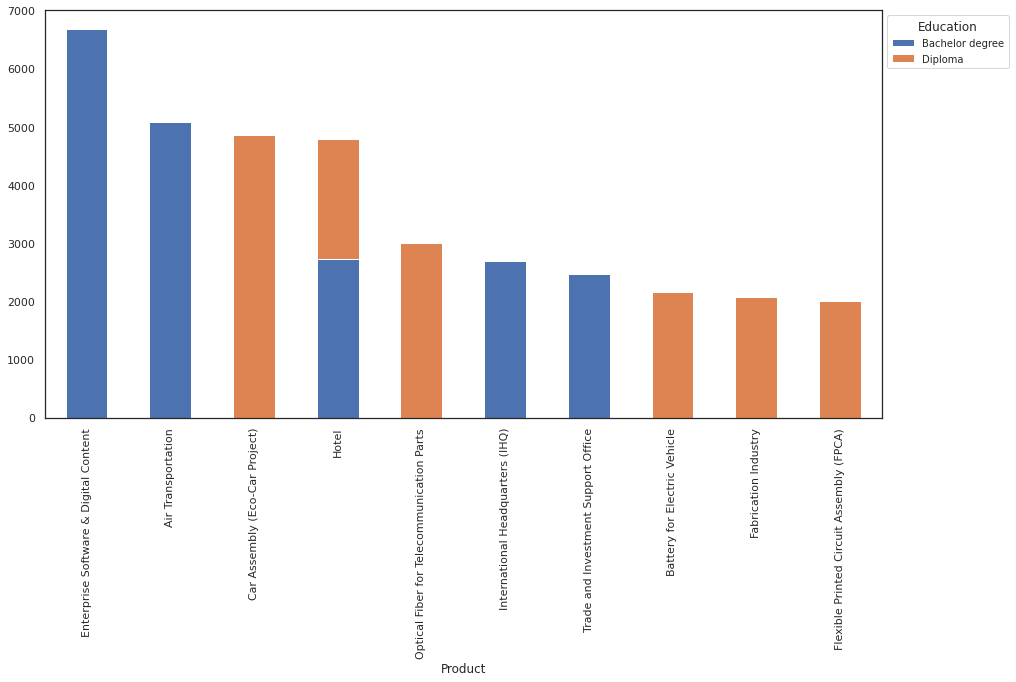

In [50]:
import seaborn as sns
sns.set(rc={'figure.figsize':(15,7.5)})
#set seaborn plotting aesthetics
sns.set(style='white')

#create stacked bar chart
ax = table.plot(kind='bar', stacked=True)
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
plt.setp(ax.get_legend().get_texts(), fontsize='10')
plt.show()

## Faculty by education level by year

สาขาของป ตรีที่ต้องการแรงงานมากที่สุด 5 อันดับในแต่ละปี  เปรียบเทียบ trend เรียงไปตั้งแต่ปี 58-64 ว่ามีการเปลี่ยนแปลงหรือไม่
สาขาของอาชีวะที่ต้องการแรงงานมากที่สุด 5 อันดับในแต่ละปี  เปรียบเทียบ trend เรียงไปตั้งแต่ปี 58-64 ว่ามีการเปลี่ยนแปลงหรือไม่


### Preparation

In [51]:
Bach = summary_with_dim[summary_with_dim["ระดับการศึกษา"] == "ปริญญาตรี"]
Diploma = summary_with_dim[summary_with_dim["ระดับการศึกษา"] != "ปริญญาตรี"]

In [52]:
df_list = []
for year in all_year:
  temp_df = Bach[Bach['Year'] == year]
  temp_group = temp_df.groupby("Major").sum().nlargest(n=5, columns = ["Count"]).sort_values(by=['Count'], ascending=False)
  temp_group['Year'] = year
  df_list.append(temp_group)

Bach_byFaculty_byYear = pd.concat(df_list)

### Chart Bacholar

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: MatplotlibDeprecationWarning: 
The createFontList function was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use FontManager.addfont instead.
  This is separate from the ipykernel package so we can avoid doing imports until


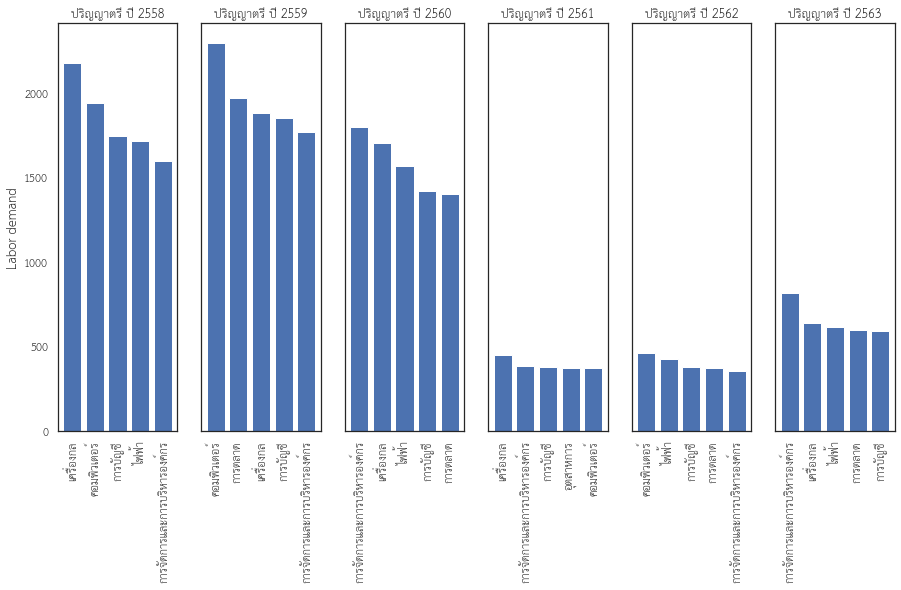

<Figure size 1800x720 with 0 Axes>

In [59]:
import matplotlib
import matplotlib.font_manager as fm
fm.fontManager.ttflist += fm.createFontList(['thsarabunnew-webfont.ttf'])
matplotlib.rc('font', family='TH Sarabun New')

fig, axs = plt.subplots(1, 6 ,sharey='row')


# Some example data to display

fig = plt.figure(figsize = (25, 10))

for index, year in enumerate(all_year):  # loop year
  filter_data = Bach_byFaculty_byYear[Bach_byFaculty_byYear['Year'] == year]
  axs[index].bar(filter_data.index, filter_data.Count)
  axs[index].set_title("ปริญญาตรี ปี "+year)

for ax in axs.flat:
    ax.set(ylabel='Labor demand')

# Hide x labels and tick labels for top plots and y ticks for right plots.

for ax in axs.flat:
  ax.label_outer()
  for tick in ax.get_xticklabels():
      tick.set_rotation(90)

plt.show()

### Preparation

In [54]:
df_list = []
for year in all_year:
  temp_df = Diploma[Diploma['Year'] == year]
  temp_group = temp_df.groupby("Major").sum().nlargest(n=5, columns = ["Count"]).sort_values(by=['Count'], ascending=False)
  temp_group['Year'] = year
  df_list.append(temp_group)

Dip_byFaculty_byYear = pd.concat(df_list)

### Chart Diploma

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: MatplotlibDeprecationWarning: 
The createFontList function was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use FontManager.addfont instead.
  This is separate from the ipykernel package so we can avoid doing imports until


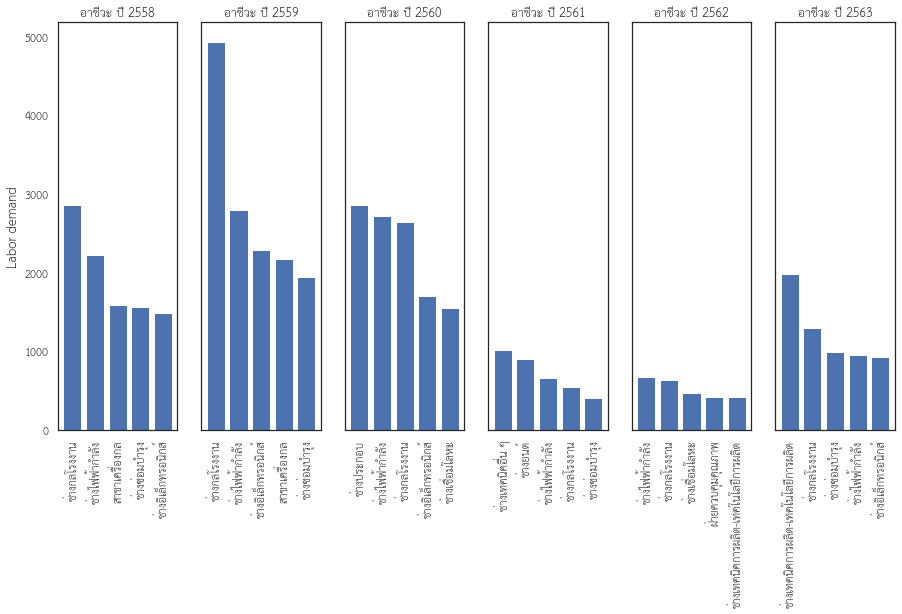

<Figure size 1800x720 with 0 Axes>

In [55]:
import matplotlib
import matplotlib.font_manager as fm
fm.fontManager.ttflist += fm.createFontList(['thsarabunnew-webfont.ttf'])
matplotlib.rc('font', family='TH Sarabun New')

fig, axs = plt.subplots(1, 6 ,sharey='row')


# Some example data to display

fig = plt.figure(figsize = (25, 10))

for index, year in enumerate(all_year):
  filter_data = Dip_byFaculty_byYear[Dip_byFaculty_byYear['Year'] == year]
  axs[index].bar(filter_data.index, filter_data.Count)
  axs[index].set_title("อาชีวะ ปี "+year)

for ax in axs.flat:
    ax.set(ylabel='Labor demand')

# Hide x labels and tick labels for top plots and y ticks for right plots.

for ax in axs.flat:
  ax.label_outer()
  for tick in ax.get_xticklabels():
      tick.set_rotation(90)


plt.show()

## Faculty by year

วิศวะสาขาที่ต้องการแรงงานมากที่สุด 5 อันดับในแต่ละปี  เปรียบเทียบ trend เรียงไปตั้งแต่ปี 58-64 ว่ามีการเปลี่ยนแปลงหรือไม่

### Preparation

In [62]:
summary_with_dim.head()

,ชื่อบริษัทภาษาไทย,จังหวัด,ชื่อผลิตภัณฑ์,ประเภทกิจการ,Major,Count,Faculty,Year,ระดับการศึกษา,Region_VaccineRollout_MOPH
0,อาร์ต ออฟ เบคกิ้ง,สมุทรสาคร,Frozen Pizza Disc/Pizza Dough,[1.17],อุตสาหการ,1.0,วิศวกรรมศาสตร์,2563,ปริญญาตรี,กรุงเทพมหานครและปริมณฑล
1,เอ็นจีเค สปาร์คปลั๊กส์ (ประเทศไทย),ชลบุรี,Oxygen Sensor,[4.8.17],อุตสาหการ,2.0,วิศวกรรมศาสตร์,2563,ปริญญาตรี,ภาคตะวันออก
2,ไทยนามพลาสติกส์,สมุทรสาคร,Synthetic Leather & Plastic Sheet,[6.6],อุตสาหการ,1.0,วิศวกรรมศาสตร์,2563,ปริญญาตรี,กรุงเทพมหานครและปริมณฑล
3,ซึบากิ (ไทยแลนด์),สมุทรปราการ,Eco-Friendly Plastic Packaging,[6.2.2],อุตสาหการ,1.0,วิศวกรรมศาสตร์,2563,ปริญญาตรี,กรุงเทพมหานครและปริมณฑล
4,โมเดิร์น ลักเกจ,ชลบุรี,Travel Luggage,[3.3],อุตสาหการ,1.0,วิศวกรรมศาสตร์,2563,ปริญญาตรี,ภาคตะวันออก


In [63]:
Engineer = summary_with_dim[summary_with_dim["Faculty"] == "วิศวกรรมศาสตร์"]


df_list = []
for year in all_year:
  temp_df = Engineer[Engineer['Year'] == year]
  temp_group = temp_df.groupby("Major").sum().nlargest(n=5, columns = ["Count"]).sort_values(by=['Count'], ascending=False)
  temp_group['Year'] = year
  df_list.append(temp_group)

Faculty_byYear = pd.concat(df_list)

### Chart

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: MatplotlibDeprecationWarning: 
The createFontList function was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use FontManager.addfont instead.
  This is separate from the ipykernel package so we can avoid doing imports until


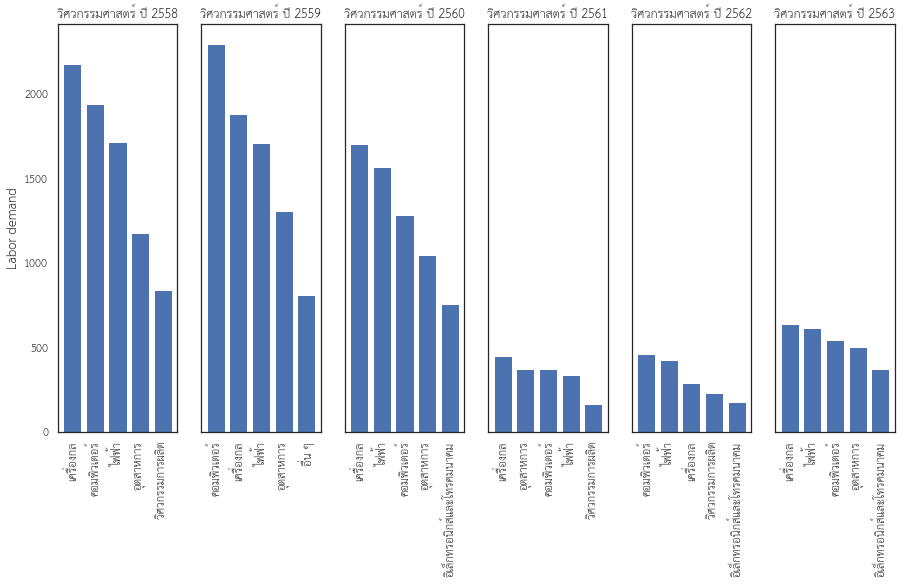

<Figure size 1800x720 with 0 Axes>

In [58]:
import matplotlib
import matplotlib.font_manager as fm
fm.fontManager.ttflist += fm.createFontList(['thsarabunnew-webfont.ttf'])
matplotlib.rc('font', family='TH Sarabun New')

fig, axs = plt.subplots(1, 6 ,sharey='row')


# Some example data to display

fig = plt.figure(figsize = (25, 10))

for index, year in enumerate(all_year):
  filter_data = Faculty_byYear[Faculty_byYear['Year'] == year]
  axs[index].bar(filter_data.index, filter_data.Count)
  axs[index].set_title("วิศวกรรมศาสตร์ ปี "+ year)

for ax in axs.flat:
    ax.set(ylabel='Labor demand')

# Hide x labels and tick labels for top plots and y ticks for right plots.

for ax in axs.flat:
  ax.label_outer()
  for tick in ax.get_xticklabels():
      tick.set_rotation(90)


plt.show()